In [76]:
import numpy as np
from numpy import *
from numpy import nan
import os
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import re

In [77]:
path = os.path.expanduser('~/Documents/JSNH/')
Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 

SEDParams = ['fmuopt','fmuir','tform','gamma','metals','odepthbc','mu2','M','sfr2','lum2']
final_data = []
# Loop through each row in Montague
for index, row in Montague.iterrows():
    potato = str(row['id'])
    potato = potato[:-2]
    
    with open(os.path.expanduser(path + '/' + potato + '.sed')) as f:
        lines = f.readlines()
#         values = re.findall(r'[-+]?\d*\.\d+|\d+', lines[3])  # Extract numerical values from the 4th line
        values = re.findall(r'[+-]?(\d+\.\d+E[+-]?\d+|\d+\.\d+|\.\d+|\d+)', lines[3])
        
        # Create a dictionary for the current row
        row_data = {'id': potato}
        for col, value in zip(SEDParams, values):
            row_data[col] = float(value)  # Convert values to float
            
        # Append the row data to the final_data list
        final_data.append(row_data)

# Create the final dataframe
final_dataframe = pd.DataFrame(final_data).set_index('id')
final_dataframe.insert(0, 'id', final_dataframe.index)
final_dataframe.reset_index(drop=True, inplace=True)
final_dataframe['id'] = final_dataframe['id'].astype(int)
# Parameters=[r'SFH $f_{mu}$',r'IR $f_{mu}$',r'$\mu$',r'$\tau_V$',r'sSFR$_{0.1Gyr}$','M(stars)','Ldust',r'$T_C^{ISM}$',r'$T_W^{BC}$',r'$\chi_C^{tot}$',r'$\chi_{PAH}^{tot}$',r'$\chi_{MIR}^{tot}$',r'$\chi_{W}^{tot}$',r'$\tau_{V}^{ISM}$','M(dust)',r'$SFR_{0.1Gyr}$',r'$A_V$',r'$age_M$','Tdust','lg(M/Lh)','lg(M/Lk)']
# Parameters=['2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
Parameters=['sfh','IR fmu','mu','tau_V','sSFR','M(stars)','L(dust)','T_C^ISM','T_W^BC','chi_C^tot','chi_PAH^tot','chi_MIR^tot','chi_W^tot','tau_V^ISM','M(dust)','SFR','A_V','age','Tdust','lg(M/Lh)','lg(M/Lk)']
Cheesy=[]
Toasty=[]
runawayslowly=[]
twochillies = []
for Curl in range(len(Montague)):
    potato=str(Montague['id'][Curl])
#     potato=str(735)
    Minestrone = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip', )
    Minestrone2 = pd.DataFrame(columns=['Full'])
    potato=int(potato)
    redshift =float(Minestrone.index[6].split()[-1])
    runawayslowly.append(redshift)
    chi2 = float(Minestrone.index[6].split()[2])
    twochillies.append(chi2)
    line = Minestrone.index[8].split(" ")
    while("" in line):
        line.remove("")
    str_line = " ".join(str(item) for item in line)
    Minestrone2.loc[0]=str(str_line)
    Minestrone2[Parameters] = Minestrone2['Full'].str.split(" ",expand=True,)
    Minestrone2=Minestrone2.drop(['Full'],axis=1)
    Cheesy.append(Minestrone2.iloc[0])
    Toasty.append(potato)
INeedHelp=Table(Cheesy).to_pandas()
INeedHelp=transpose(INeedHelp).reset_index(drop=True)
INeedHelp.columns = [Parameters]
INeedHelp.insert(0,'Galaxy_ID',Toasty) #Galaxy_ID
INeedHelp.insert(1,'redshift',runawayslowly) #redshift
INeedHelp.insert(23,'chi2',twochillies) #chi2
INeedHelp

,Galaxy_ID,redshift,sfh,IR fmu,mu,tau_V,sSFR,M(stars),L(dust),T_C^ISM,...,chi_W^tot,tau_V^ISM,M(dust),SFR,A_V,age,Tdust,lg(M/Lh),lg(M/Lk),chi2
0,77910,5.775470,0.240,0.436,0.460,0.175,7.890E-09,1.754E+08,6.633E+09,35.9,...,0.357,0.081,4.701E+06,1.384E+00,0.167,7.962,29.348,-0.749,-0.553,0.610
1,84518,5.762800,0.332,0.463,0.758,0.054,8.500E-09,1.561E+08,2.690E+09,49.7,...,0.442,0.041,1.676E+05,1.327E+00,0.055,7.906,42.998,-0.410,-0.152,0.711
2,88612,5.644290,0.216,0.413,0.968,0.831,1.427E-08,1.661E+08,2.957E+10,38.2,...,0.477,0.804,4.010E+06,2.370E+00,0.897,7.553,37.272,-0.844,-0.682,0.211
3,90354,7.664050,0.273,0.463,0.260,4.773,1.160E-08,3.887E+10,6.958E+12,49.7,...,0.442,1.239,4.335E+08,4.509E+02,4.934,7.574,42.998,-0.265,-0.185,1.035
4,94574,5.517670,0.194,0.278,0.703,0.045,1.237E-08,3.673E+07,8.706E+08,69.4,...,0.659,0.032,1.432E+05,4.543E-01,0.049,7.551,60.241,-0.979,-0.783,0.654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,219026,5.526460,0.249,0.436,0.308,0.145,6.560E-09,3.133E+08,8.887E+09,35.9,...,0.357,0.045,6.298E+06,2.056E+00,0.108,8.049,29.348,-0.611,-0.382,0.389
126,219038,5.548820,0.365,0.463,0.899,0.356,1.205E-08,1.304E+08,1.061E+10,49.7,...,0.442,0.321,6.609E+05,1.572E+00,0.386,7.856,42.998,-0.507,-0.248,0.591
127,219057,7.239130,0.105,0.278,0.087,0.146,1.187E-08,1.181E+08,1.130E+10,69.4,...,0.659,0.013,1.858E+06,1.402E+00,0.115,7.391,60.241,-1.090,-0.905,0.937
128,219195,7.553060,0.259,0.436,0.625,0.096,4.788E-09,4.679E+08,5.787E+09,35.9,...,0.357,0.060,4.102E+06,2.240E+00,0.082,8.215,29.348,-0.572,-0.354,0.334


In [78]:
INeedHelp.to_csv('JSNH-Parameters.csv',index=False)
Diseased = pd.read_csv(os.path.expanduser('~/notebook/Forrest/'+'JSNH-Parameters.csv')) 
NewParamFile = pd.merge(Diseased, final_dataframe, left_on='Galaxy_ID', right_on='id')# NewParamFile = .merge(final_dataframe, left_on='Galaxy_ID', right_on='id', how='left')
NewParamFile

,Galaxy_ID,redshift,sfh,IR fmu,mu,tau_V,sSFR,M(stars),L(dust),T_C^ISM,...,fmuopt,fmuir,tform,gamma,metals,odepthbc,mu2,M,sfr2,lum2
0,77910,5.775470,0.240,0.436,0.460,0.175,7.890000e-09,1.754000e+08,6.633000e+09,35.9,...,0.240,0.436,270200000.0,0.542,1.720,0.175,0.460,1.754000e+08,7.907000e-09,6.651000e+09
1,84518,5.762800,0.332,0.463,0.758,0.054,8.500000e-09,1.561000e+08,2.690000e+09,49.7,...,0.332,0.463,240000000.0,0.353,0.065,0.054,0.758,1.561000e+08,8.535000e-09,2.698000e+09
2,88612,5.644290,0.216,0.413,0.968,0.831,1.427000e-08,1.661000e+08,2.957000e+10,38.2,...,0.216,0.413,107200000.0,0.275,1.935,0.831,0.967,1.661000e+08,1.248000e-08,2.586000e+10
3,90354,7.664050,0.273,0.463,0.260,4.773,1.160000e-08,3.887000e+10,6.958000e+12,49.7,...,0.273,0.463,112800000.0,0.193,1.044,4.773,0.259,3.887000e+10,1.228000e-08,7.356000e+12
4,94574,5.517670,0.194,0.278,0.703,0.045,1.237000e-08,3.673000e+07,8.706000e+08,69.4,...,0.194,0.278,105500000.0,1.140,1.757,0.045,0.703,3.673000e+07,1.246000e-08,8.778000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,219026,5.526460,0.249,0.436,0.308,0.145,6.560000e-09,3.133000e+08,8.887000e+09,35.9,...,0.249,0.436,307000000.0,1.919,0.895,0.145,0.308,3.133000e+08,6.555000e-09,8.868000e+09
126,219038,5.548820,0.365,0.463,0.899,0.356,1.205000e-08,1.304000e+08,1.061000e+10,49.7,...,0.365,0.463,958600000.0,0.619,0.134,0.356,0.899,1.304000e+08,1.204000e-08,1.061000e+10
127,219057,7.239130,0.105,0.278,0.087,0.146,1.187000e-08,1.181000e+08,1.130000e+10,69.4,...,0.105,0.278,283200000.0,1.717,1.904,0.146,0.087,1.181000e+08,1.190000e-08,1.133000e+10
128,219195,7.553060,0.259,0.436,0.625,0.096,4.788000e-09,4.679000e+08,5.787000e+09,35.9,...,0.259,0.436,450200000.0,1.262,1.182,0.096,0.624,4.679000e+08,4.793000e-09,5.792000e+09


In [79]:
# INeedHelp[INeedHelp['Galaxy_ID']==7071]
# INeedHelp.to_csv('MT2-Parameters.csv',index=False)
NewParamFile.to_csv('JSNH-full-Parameters.csv',index=False)

In [29]:
# INeedHelp.to_csv('GoodIRAC0-PARAMETERS.csv')
# INeedHelp.to_csv('FINALM-PARAMETERS.csv')

# Carpenter.to_csv('Parameters1226mag')
##.fmu(SFH)...fmu(IR)........mu......tauv........sSFR..........M*.......Ldust......T_W^BC.....T_C^ISM....xi_C^tot..xi_PAH^tot..xi_MIR^tot....xi_W^tot.....tvism.......Mdust.....SFR......A_V......age_M......Tdust......lg(M/Lh)....lg(M/Lk)

In [19]:
# path = os.path.expanduser('~/Documents/IRAC4/')
array=[]
for j in range(1):
    potato=str(Montague['id'][j])
# potato=str(22136)
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    galaxy_fit3 = pd.DataFrame(columns=[])
    galaxy_fit_s = galaxy_fit.drop(galaxy_fit.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])
    for i in range(len(galaxy_fit_s)):
        line = galaxy_fit_s.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=1:
            ok=pd.DataFrame(line)
            galaxy_fit3=pd.concat([galaxy_fit3,ok],axis=1)
            continue

        str_line = " ".join(str(item) for item in line)
        galaxy_fit3.loc[i]=str(str_line)


    Properties=galaxy_fit3.T
    Properties.rename(columns={0:'A',1:'B',2:'C',3:'D',4:'E'}, inplace=True)
    Properties.reset_index(inplace=True,drop=True)
    for col in Properties.select_dtypes(['object']):
        Properties[col] = pd.to_numeric(Properties[col].str.rstrip('%'), errors='coerce')
    selected_properties = Properties[Properties.shape[1] == 6]
    print(selected_properties)
    if not selected_properties.empty:
        sSFRl = 10**(selected_properties.iloc[303]['A'])  # 2sigma lower
        sSFRh = 10**(selected_properties.iloc[303]['E'])  # 2sigma higher
        SMl = 10**(selected_properties.iloc[376]['A'])
        SMh = 10**(selected_properties.iloc[376]['E'])
        SFRl = 10**(selected_properties.iloc[796]['A'])
        SFRh = 10**(selected_properties.iloc[796]['E'])
        array2 = [sSFRl, sSFRh, SMl, SMh, SFRl, SFRh]
        selected_rows.append(array2)
#     sSFRl=10**(Properties.iloc[303]['A']) #2sigma lower
#     sSFRh=10**(Properties.iloc[303]['E']) #2sigma higher
#     SMl=10**(Properties.iloc[376]['A']) 
#     SMh=10**(Properties.iloc[376]['E'])
#     SFRl=10**(Properties.iloc[796]['A']) 
#     SFRh=10**(Properties.iloc[796]['E'])
#     array2 = [sSFRl,sSFRh,SMl,SMh,SFRl,SFRh]
#     array.append(array2)
# array

KeyError: True

In [91]:
selected_rows = []

for j in range(3):
    potato = str(Montague['id'][j])
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'), skiprows=14, delim_whitespace=True)
    galaxy_fit.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    Properties = galaxy_fit
    Properties.reset_index(inplace=True, drop=True)
    for col in Properties.select_dtypes(['object']):
        Properties[col] = pd.to_numeric(Properties[col].str.rstrip('%'), errors='coerce')

    # Select the rows where the first 5 columns are not NaN values
    selected_properties = Properties.dropna(subset=['A', 'B', 'C', 'D', 'E'], how='any')

    if not selected_properties.empty:
        sSFRl = 10**(selected_properties.iloc[4]['A'])  # 2sigma lower
        sSFRh = 10**(selected_properties.iloc[4]['E'])  # 2sigma higher
        SMl = 10**(selected_properties.iloc[5]['A'])
        SMh = 10**(selected_properties.iloc[5]['E'])
        SFRl = 10**(selected_properties.iloc[15]['A'])
        SFRh = 10**(selected_properties.iloc[15]['E'])
        array2 = [sSFRl, sSFRh, SMl, SMh, SFRl, SFRh]
        selected_rows.append(array2)

# Create the final DataFrame
selected_df = pd.DataFrame(selected_rows, columns=['sSFRl', 'sSFRh', 'SMl', 'SMh', 'SFRl', 'SFRh'])

In [92]:
selected_df

,sSFRl,sSFRh,SMl,SMh,SFRl,SFRh
0,1.348963e-11,1.698244e-11,2.290868e+11,2.344229e+11,3.104560,3.819443
1,7.498942e-09,1.188502e-08,9.375620e+09,1.905461e+10,92.682982,207.491352
2,6.683439e-10,9.440609e-09,1.905461e+10,4.897788e+10,23.014418,235.504928


In [7]:
# 10**(11.53)
log10(2.590E+11)

11.413299764081252

In [16]:
Er=pd.DataFrame(array)
Er.rename(columns={0:'sSFRl',1:'sSFRh',2:'SMl',3:'SMh',4:'SFRl',5:'SFRh'}, inplace=True)
Er.insert(0,'Galaxy_ID',Toasty)
Er.to_csv('ZFOURGE-Errorbars.csv')
Er

,Galaxy_ID,sSFRl,sSFRh,SMl,SMh,SFRl,SFRh
0,6020,1.348963e-11,1.698244e-11,7.079458e+08,NaN,2.238721e+07,NaN
1,6235,7.498942e-09,1.188502e-08,7.079458e+08,NaN,2.238721e+07,NaN
2,6329,6.683439e-10,9.440609e-09,7.079458e+08,NaN,2.238721e+07,NaN
3,6465,6.683439e-10,9.440609e-10,7.079458e+08,NaN,2.238721e+07,NaN
4,6525,6.683439e-10,2.113489e-09,7.079458e+08,NaN,2.238721e+07,NaN
...,...,...,...,...,...,...,...
677,30249,1.059254e-08,1.059254e-08,7.079458e+08,NaN,2.238721e+07,NaN
678,30397,1.071519e-13,1.071519e-13,7.079458e+08,NaN,2.238721e+07,NaN
679,30465,1.333521e-09,9.440609e-09,7.079458e+08,NaN,2.238721e+07,NaN
680,30690,6.683439e-09,1.188502e-08,7.079458e+08,NaN,2.238721e+07,NaN


In [13]:
# Er.to_csv('FINALM_ERRORBARS.csv')
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum()/len(Er),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#CEERS4

0.088
0.09
0.092


In [26]:
path2 = os.path.expanduser('~/notebook/Forrest/')
Final_er=Table.read(os.path.expanduser(path2+'FINAL_ERRORBARS.csv'))
Final_er[Final_er['SMl']-Final_er['SMh']==0]

col0,Galaxy_ID,sSFRl,sSFRh,SMl,SMh,SFRl,SFRh
int64,int64,float64,float64,float64,float64,float64,float64
3,6465,0.00010890876985506645,0.00010890876985506645,38948.67372448891,38948.67372448891,4.314580065065104,4.314580065065104
7,6849,0.00034395490475930566,0.00034395490475930566,33189.87040279469,33189.87040279469,11.26837354023222,11.26837354023222
12,7071,0.00010890876985506645,0.00010890876985506645,33523.43414584466,33523.43414584466,3.732207941692508,3.732207941692508
23,7624,0.00017956020542583297,0.00017956020542583297,38948.67372448891,38948.67372448891,7.007633115336252,7.007633115336252
32,8024,0.00034395490475930566,0.00034395490475930566,22026.465794806718,22026.465794806718,7.667571944441955,7.667571944441955
68,9631,0.00016247279265951725,0.00016247279265951725,49513.468378402154,49513.468378402154,8.182518595626282,8.182518595626282
...,...,...,...,...,...,...,...
640,28245,0.0002960447300568554,0.0002960447300568554,20785.273289487803,20785.273289487803,6.153370620144381,6.153370620144381
648,28479,0.00017956020542583297,0.00017956020542583297,33523.43414584466,33523.43414584466,6.031525718230289,6.031525718230289


In [18]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#Zfourge

127
0.185
0.208


In [18]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#Zfourge = forest

127
0.185
0.208


In [15]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum()/len(Er),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#M5

0.16
0.16
0.176


In [25]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum()/len(Er),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#BAD45

0.654
0.63
0.677


In [32]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#IRAC0

33
0.268
0.331


In [35]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#Badx2

58
0.433
0.528


In [73]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#IA570

120
0.906
0.945


In [79]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#IRAC1

83
0.638
0.693


In [85]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#IRAC2

76
0.583
0.646


In [91]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#IRAC3

115
0.866
0.937


In [97]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#IRAC4

104
0.787
0.858


In [103]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#MRAC0

27
0.239
0.312


In [ ]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#HSTfor

In [137]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#GFIR0

24
0.041
0.063


In [153]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#IR12

52
0.402
0.472


In [160]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#IR25

46
0.354
0.409


In [7]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#FINAL

70
0.101
0.133


In [34]:
A = Er['SMh']-Er['SMl']
print(round((A == 0).sum(),3))
B = Er['SFRh']-Er['SFRl']
print(round((B == 0).sum()/len(Er),3))
C = Er['sSFRh']-Er['sSFRl']
print(round((C == 0).sum()/len(Er),3))#FINALM

70
0.101
0.133


In [10]:
Er[(Er['SMh']-Er['SMl']) == 0]['Galaxy_ID'].to_csv('Unconstrained-FINAL.csv')
# 46/682

In [38]:
path2 = os.path.expanduser('~/notebook/Forrest/')
Final_er=Table.read(os.path.expanduser(path2+'FINAL_ERRORBARS.csv'))
Final_er[Final_er['SMl']-Final_er['SMh']==0]['Galaxy_ID'].tolist()

[6465,
 6849,
 7071,
 7624,
 8024,
 9631,
 9930,
 10017,
 10092,
 10146,
 10834,
 11172,
 11594,
 11783,
 11861,
 11923,
 12070,
 12422,
 12533,
 12768,
 12824,
 13914,
 14063,
 14397,
 14808,
 14967,
 15254,
 15561,
 15878,
 16024,
 16573,
 16683,
 16837,
 16909,
 17250,
 17583,
 17974,
 17994,
 18053,
 18097,
 18604,
 18632,
 18926,
 19484,
 19863,
 20315,
 21442,
 21488,
 21759,
 22468,
 22768,
 22869,
 23421,
 23429,
 23511,
 23758,
 24402,
 24528,
 25302,
 26598,
 26816,
 28035,
 28076,
 28245,
 28479,
 29139,
 29263,
 29639,
 30690,
 30781]

In [19]:
#Er[(Er['SMh']-Er['SMl']) == 0]['Galaxy_ID'].to_csv('Bad-IDs.csv')

In [118]:
pathpro = os.path.expanduser('~/R-Stuff/')
import matplotlib.pyplot as plt
Pro = pd.read_csv(os.path.expanduser(pathpro+'ProSpect_Forrest.csv')) 
pd.set_option('display.max_columns', None)
Pro

,id,z,mSFR,mpeak,mperiod,mskew,tau_birth,tau_screen,alpha_SF_birth,alpha_SF_screen,Zfinal,LP,masstot,dustmass.birth,dustmass.screen,dustmass.total,dustlum.birth,dustlum.screen,dustlum.total,SFRburst,StellarMass,mSFR_LB,mpeak_LB,mperiod_LB,mskew_LB,tau_birth_LB,tau_screen_LB,alpha_SF_birth_LB,alpha_SF_screen_LB,Zfinal_LB,LP_LB,masstot_LB,dustmass.birth_LB,dustmass.screen_LB,dustmass.total_LB,dustlum.birth_LB,dustlum.screen_LB,dustlum.total_LB,SFRburst_LB,StellarMass_LB,mSFR_UB,mpeak_UB,mperiod_UB,mskew_UB,tau_birth_UB,tau_screen_UB,alpha_SF_birth_UB,alpha_SF_screen_UB,Zfinal_UB,LP_UB,masstot_UB,dustmass.birth_UB,dustmass.screen_UB,dustmass.total_UB,dustlum.birth_UB,dustlum.screen_UB,dustlum.total_UB,SFRburst_UB,StellarMass_UB
0,10008,3.06034,1.840063,-1.818889,-0.516438,0.572322,-0.961189,-0.094841,2.631995,3.992728,-3.103849,-66.262524,1.720270e+10,9.515471e+08,7.246162e+09,8.197709e+09,1.415093e+11,6.131944e+11,7.547037e+11,66.648284,1.549171e-126,1.764634,-2.000000,-0.516438,0.227906,-2.500000,-0.112271,0.742584,0.0,-4.000000,-70.805042,1.490192e+10,1.000555e+05,5.170439e+06,1.286918e+07,4.218540e+09,5.625597e+11,6.277787e+11,56.538954,1.341977e-126,1.847747,-1.014963,-0.246969,1.000000,-0.837211,-0.083632,3.789755,4.000000,-2.770053,-66.262524,2.905377e+10,2.035578e+09,7.508693e+09,8.741357e+09,1.888325e+11,7.258999e+11,8.183332e+11,68.044091,2.616407e-126
1,10017,3.30089,1.843315,-1.864857,-0.473470,-0.161337,0.108337,-2.378547,0.601834,0.724973,-3.337020,-104.133450,3.674138e+10,6.838953e+06,8.273379e+04,6.921687e+06,4.579652e+11,4.373675e+09,4.623389e+11,67.480580,2.360407e+06,1.843315,-2.000000,-0.516545,-0.299606,0.029472,-2.500000,0.000000,0.0,-3.619796,-108.867812,3.310213e+10,3.999089e+06,3.056642e+04,4.163313e+06,4.538513e+11,3.276476e+09,4.609147e+11,66.702149,2.126607e+06,1.867756,-0.974017,-0.391795,-0.003503,1.500000,-1.324326,2.179093,4.000000,-3.226357,-104.133450,4.901891e+10,1.867646e+09,5.656733e+08,1.887462e+09,5.184351e+11,5.017120e+10,5.604316e+11,71.793951,3.149162e+06
2,10018,2.57004,1.565824,-1.533946,-0.346769,0.730287,-0.159169,-0.810779,2.739562,1.924293,-1.489373,-74.292997,1.271770e+10,1.420509e+09,1.054317e+08,1.525941e+09,1.931904e+11,5.557139e+10,2.487618e+11,35.817390,1.202702e-35,1.534631,-2.000000,-0.479330,0.238119,-0.201529,-0.925035,0.908355,0.0,-1.593281,-79.267446,1.110565e+10,5.721692e+06,3.612267e+05,1.108856e+07,1.823600e+11,3.957272e+10,2.233200e+11,33.328195,1.050252e-35,1.565824,-1.041651,-0.310507,1.000000,-0.077952,-0.810779,3.955526,4.000000,-1.370050,-74.292997,1.486866e+10,2.273593e+09,6.500793e+08,2.632617e+09,2.010952e+11,5.640908e+10,2.535749e+11,35.885897,1.406116e-35
3,10055,2.81789,1.344075,-2.000000,-0.062018,-0.500000,-0.284307,-2.500000,2.591103,0.514585,-1.300000,-77.867347,6.148986e+10,6.536032e+08,1.124853e+04,6.536145e+08,1.009809e+11,8.597180e+08,1.018406e+11,21.534567,2.518895e+09,1.330159,-2.000000,-0.070008,-0.500000,-0.406930,-2.500000,0.464923,0.0,-1.384372,-83.049066,4.071157e+10,1.187189e+06,7.515608e+03,2.048589e+06,8.764332e+10,8.529363e+08,9.388036e+10,20.852728,1.667725e+09,1.361978,-0.594373,0.549797,0.741379,-0.246871,-1.246642,3.512094,3.022010,-1.300000,-77.867347,6.861545e+10,1.078320e+09,5.756994e+07,1.081380e+09,1.081019e+11,1.670626e+10,1.131633e+11,22.471705,2.810791e+09
4,10066,3.11135,2.281404,-0.849205,-0.627181,-0.130611,-0.467982,-0.075610,3.168686,1.866760,-3.271182,-79.486660,9.065244e+10,6.514497e+09,2.053601e+09,8.568098e+09,6.930793e+11,1.303275e+12,1.996354e+12,170.766287,2.419728e+08,2.229493,-1.296977,-0.670707,-0.319834,-0.653269,-0.080153,0.898077,0.0,-3.330293,-84.327351,7.758016e+10,1.883955e+07,1.123492e+07,7.309766e+07,5.034978e+11,1.256153e+12,1.824393e+12,158.284709,2.070798e+08,2.281404,-0.836470,-0.608937,-0.016637,-0.431778,-0.069458,3.887499,1.872915,-3.008954,-79.486660,1.038976e+11,7.375264e+09,2.178089e+09,8.629997e+09,7.253358e+11,1.394406e+12,2.011584e+12,171.821977,2.773274e+08
...,...,...,...,...,...,...,...,

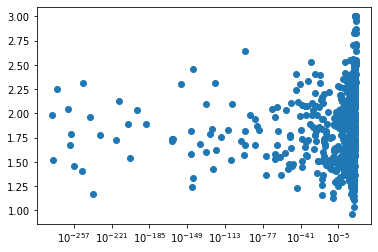

In [131]:
fig, ax = plt.subplots()
ax.scatter(Pro['StellarMass'],Pro['mSFR'],marker='o')
# ax.set_yscale('log')
ax.set_xscale('log')

In [135]:
Pro[Pro['StellarMass'] <1000]

,id,z,mSFR,mpeak,mperiod,mskew,tau_birth,tau_screen,alpha_SF_birth,alpha_SF_screen,Zfinal,LP,masstot,dustmass.birth,dustmass.screen,dustmass.total,dustlum.birth,dustlum.screen,dustlum.total,SFRburst,StellarMass,mSFR_LB,mpeak_LB,mperiod_LB,mskew_LB,tau_birth_LB,tau_screen_LB,alpha_SF_birth_LB,alpha_SF_screen_LB,Zfinal_LB,LP_LB,masstot_LB,dustmass.birth_LB,dustmass.screen_LB,dustmass.total_LB,dustlum.birth_LB,dustlum.screen_LB,dustlum.total_LB,SFRburst_LB,StellarMass_LB,mSFR_UB,mpeak_UB,mperiod_UB,mskew_UB,tau_birth_UB,tau_screen_UB,alpha_SF_birth_UB,alpha_SF_screen_UB,Zfinal_UB,LP_UB,masstot_UB,dustmass.birth_UB,dustmass.screen_UB,dustmass.total_UB,dustlum.birth_UB,dustlum.screen_UB,dustlum.total_UB,SFRburst_UB,StellarMass_UB
0,10008,3.06034,1.840063,-1.818889,-0.516438,0.572322,-0.961189,-0.094841,2.631995,3.992728,-3.103849,-66.262524,1.720270e+10,9.515471e+08,7.246162e+09,8.197709e+09,1.415093e+11,6.131944e+11,7.547037e+11,66.648284,1.549171e-126,1.764634,-2.000000,-0.516438,0.227906,-2.500000,-0.112271,0.742584,0.0,-4.000000,-70.805042,1.490192e+10,1.000555e+05,5.170439e+06,1.286918e+07,4.218540e+09,5.625597e+11,6.277787e+11,56.538954,1.341977e-126,1.847747,-1.014963,-0.246969,1.000000,-0.837211,-0.083632,3.789755,4.000000,-2.770053,-66.262524,2.905377e+10,2.035578e+09,7.508693e+09,8.741357e+09,1.888325e+11,7.258999e+11,8.183332e+11,68.044091,2.616407e-126
2,10018,2.57004,1.565824,-1.533946,-0.346769,0.730287,-0.159169,-0.810779,2.739562,1.924293,-1.489373,-74.292997,1.271770e+10,1.420509e+09,1.054317e+08,1.525941e+09,1.931904e+11,5.557139e+10,2.487618e+11,35.817390,1.202702e-35,1.534631,-2.000000,-0.479330,0.238119,-0.201529,-0.925035,0.908355,0.0,-1.593281,-79.267446,1.110565e+10,5.721692e+06,3.612267e+05,1.108856e+07,1.823600e+11,3.957272e+10,2.233200e+11,33.328195,1.050252e-35,1.565824,-1.041651,-0.310507,1.000000,-0.077952,-0.810779,3.955526,4.000000,-1.370050,-74.292997,1.486866e+10,2.273593e+09,6.500793e+08,2.632617e+09,2.010952e+11,5.640908e+10,2.535749e+11,35.885897,1.406116e-35
6,10109,2.50918,1.369560,-0.615036,-0.682163,0.365757,0.080026,-0.929241,1.813866,0.063231,-1.512309,-63.473648,9.192230e+09,1.336195e+08,1.736486e+05,1.337932e+08,1.019137e+11,1.969938e+10,1.216131e+11,18.164059,1.874207e+01,1.330290,-0.696145,-0.732548,0.052751,-0.195026,-2.500000,0.000000,0.0,-1.579668,-68.576463,8.283707e+09,7.876386e+05,6.317929e+03,7.969963e+05,6.465116e+10,4.495935e+08,7.550249e+10,14.367585,1.688968e+01,1.381895,-0.533887,-0.590065,0.416290,0.571672,-0.691118,2.046820,1.370489,-1.300000,-63.473648,1.106852e+10,1.985933e+08,4.179054e+06,1.986790e+08,1.111946e+11,3.926798e+10,1.475149e+11,20.595436,2.256764e+01
8,10146,2.99511,2.307348,-0.878386,-0.858280,0.749800,-0.166277,-0.360731,3.318241,3.197937,-1.449886,-99.780573,4.452098e+10,9.389213e+09,5.839087e+09,1.522830e+10,9.424901e+11,6.136812e+11,1.556171e+12,184.366798,0.000000e+00,2.304768,-0.939961,-0.913998,0.340588,-0.305595,-0.375529,0.952829,0.0,-1.519468,-104.852786,4.323733e+10,2.785345e+07,5.452349e+06,9.041122e+07,7.043601e+11,5.699221e+11,1.291085e+12,169.616296,0.000000e+00,2.308487,-0.840485,-0.842649,0.749800,-0.140584,-0.352665,4.000000,4.000000,-1.300000,-99.780573,4.884173e+10,1.092216e+10,7.296572e+09,1.721207e+10,9.445717e+11,6.485478e+11,1.556171e+12,184.366798,0.000000e+00
10,10161,3.83379,2.042395,-1.218742,-0.927104,0.197140,-0.627890,-0.090306,2.096746,3.088428,-3.878415,-72.085635,1.936299e+10,1.193006e+09,7.303361e+09,8.496367e+09,3.943254e+11,8.053989e+11,1.199724e+12,104.532850,1.278737e-68,1.986721,-1.447994,-1.000000,-0.049039,-2.500000,-0.115913,0.000000,0.0,-4.000000,-77.259134,1.177623e+10,5.340822e+04,5.900161e+06,8.758485e+06,6.033737e+09,6.411878e+11,8.537180e+11,82.578969,7.777052e-69,2.042395,-0.850163,-0.875295,1.000000,-0.532296,-0.087275,2.855034,4.000000,-1.974394,-72.085635,2.266982e+10,2.419473e+09,1.002678e+10,1.069094e+10,3.953187e+11,9.393898e+11,1.230587e+12,104.943026,1.497121e-68
...,...,...,...,...,...,...,...,...,